In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df = pd.read_csv('/Users/jordonez/Desktop/Brainstation/CapstoneRepo/data/checkpoint5.csv')

In [3]:
# Feature selection - selecting columns that are likely to affect homes sold
features = ['median_sale_price', 'median_list_price', 'inventory', 'months_of_supply',
            'price_growth', 'buyer_utility', 'pending_sales_ratio', 'sales_success_rate',
            'inventory_turnover', 'adjusted_months_supply', 'supply_to_list_ratio', 
            'property_type_All Residential', 'state_avg_sale_price', 'price_momentum', 
            'supply_pressure', 'demand_pressure', 'price_elasticity']

X = df[features]  # Predictor variables
y = df['homes_sold']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Initialize and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict homes sold using the test set
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression - MSE: {mse_lr}, R-squared: {r2_lr}')

Linear Regression - MSE: 100.73826222540995, R-squared: 0.755139756428168


In [6]:
# Get the coefficients from the model
coefficients = lr_model.coef_

# Create a DataFrame to display the feature names and their corresponding coefficients
coeff_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Display the coefficients
print(coeff_df)

                          Feature  Coefficient
2                       inventory    18.197892
9          adjusted_months_supply     4.230338
8              inventory_turnover     1.865292
7              sales_success_rate     1.348861
0               median_sale_price     0.894543
11  property_type_All Residential     0.770477
12           state_avg_sale_price     0.583186
5                   buyer_utility     0.034828
4                    price_growth     0.021712
16               price_elasticity     0.006820
13                 price_momentum    -0.002002
6             pending_sales_ratio    -0.280873
1               median_list_price    -0.573392
15                demand_pressure    -0.733745
14                supply_pressure    -2.071535
10           supply_to_list_ratio    -2.164395
3                months_of_supply    -5.881255


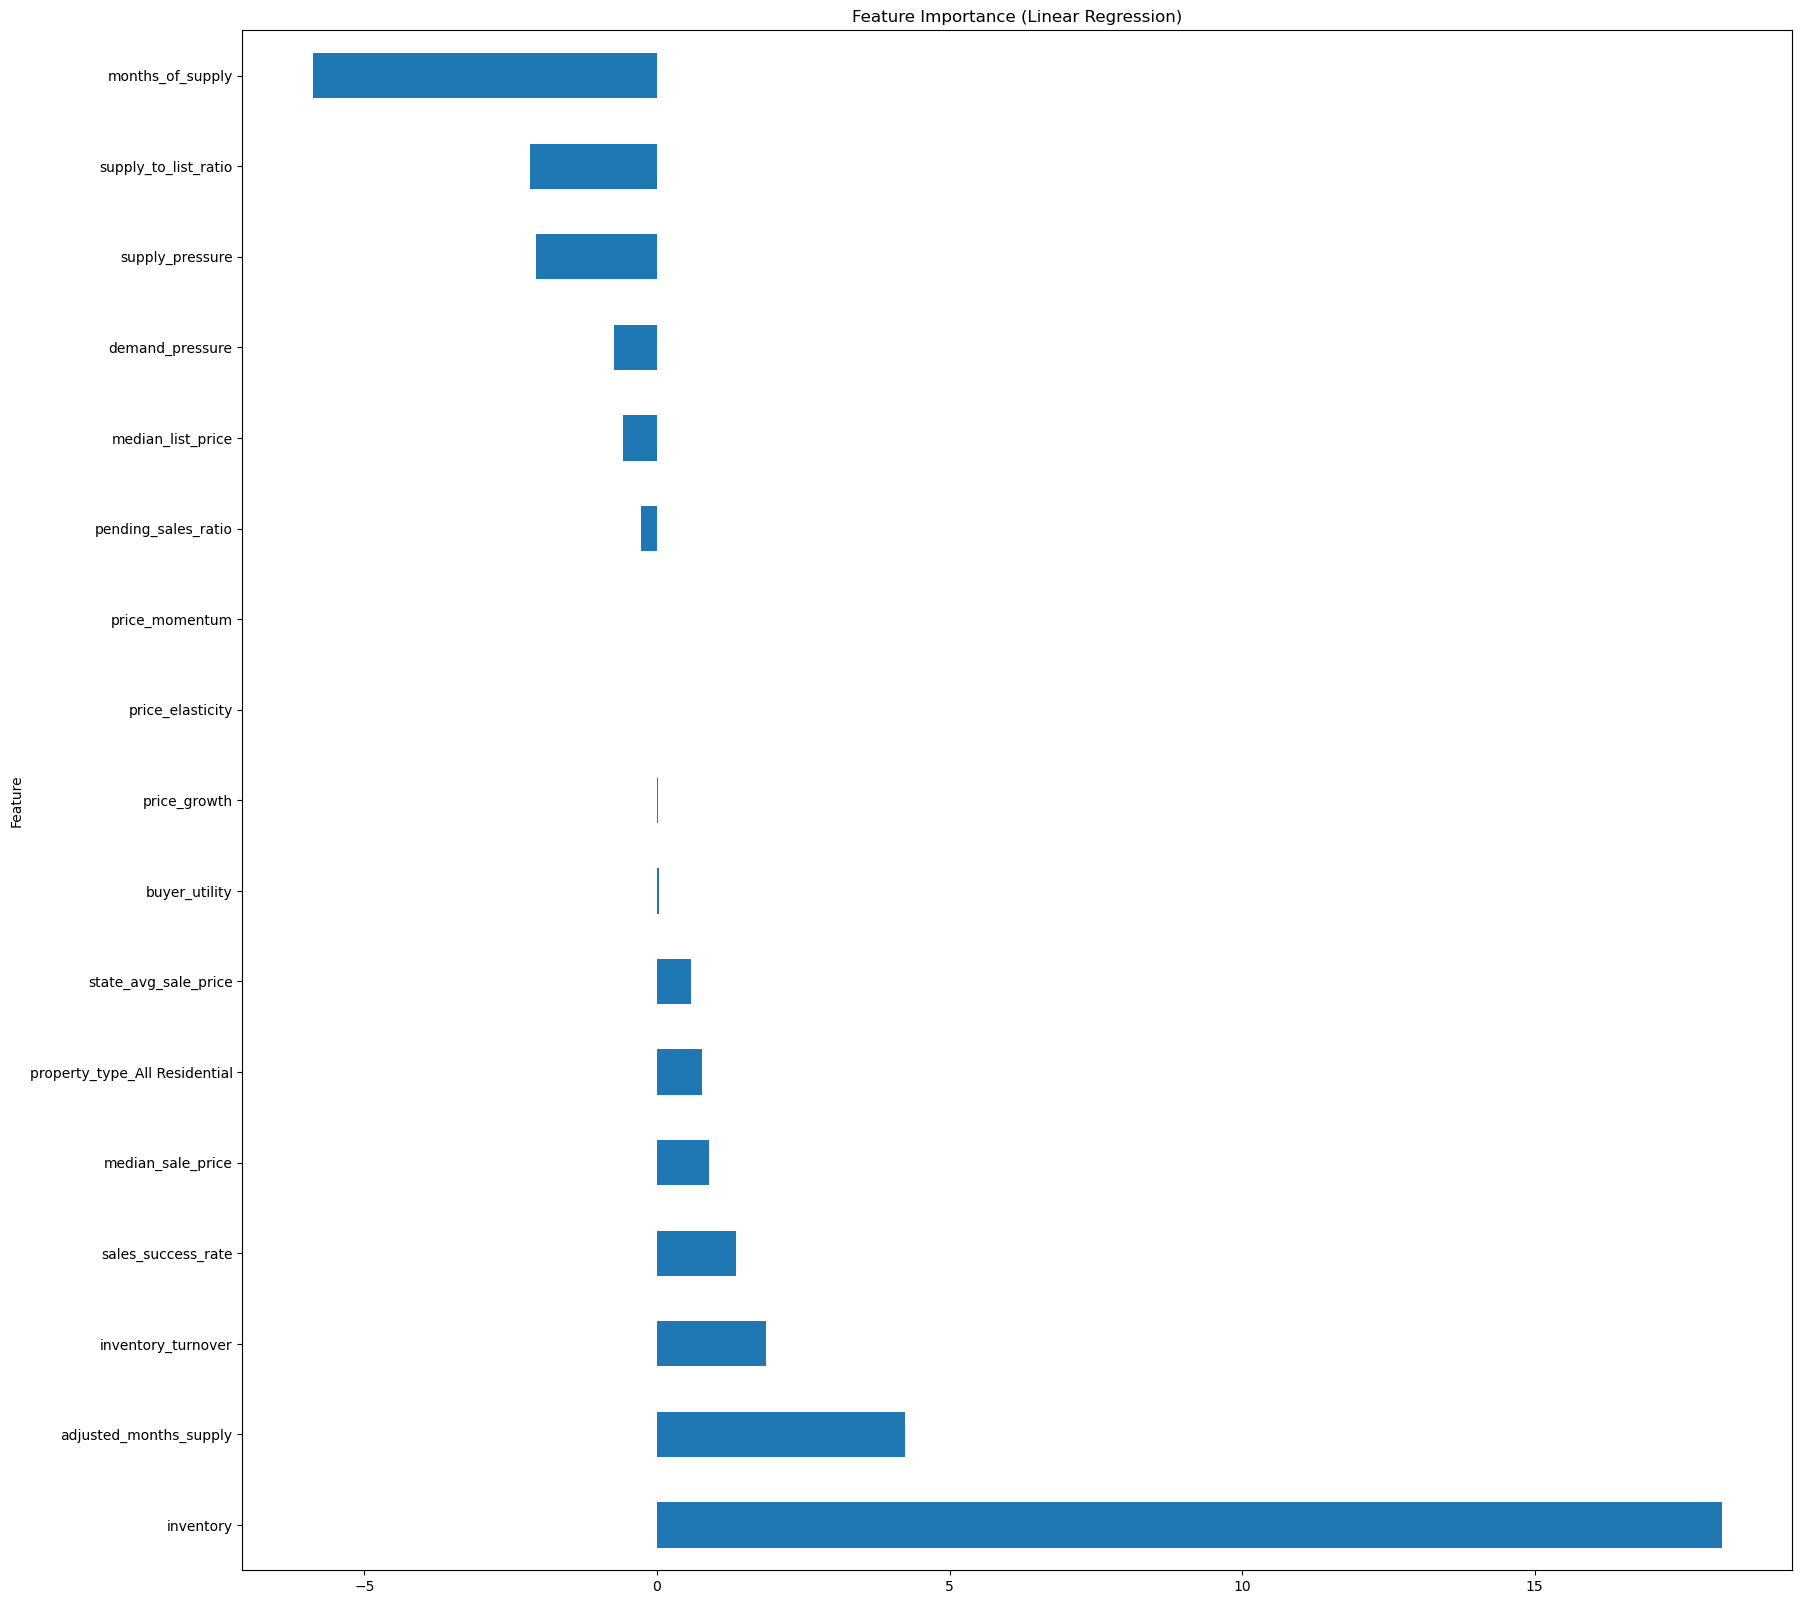

In [7]:
# Plot feature importance based on the coefficients
coeff_df.plot(kind='barh', x='Feature', y='Coefficient', title='Feature Importance (Linear Regression)', legend=False, figsize=(20, 20))
plt.show()

In [8]:
X = df.drop(columns=['median_sale_price', 'Unnamed: 0'])  # Predictor variables
y = df['median_sale_price']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Predict buyer utility on the test data
y_pred = lr_model.predict(X_test)

In [11]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


Mean Squared Error: 5983453454.910419
R-squared: 0.847707192781659


In [12]:
# Get the coefficients from the model
coefficients = lr_model.coef_

# Create a DataFrame to display the feature names and their corresponding coefficients
coeff_df = pd.DataFrame({
    'Feature': df.drop(columns=['median_sale_price', 'Unnamed: 0']).columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Display the coefficients
print(coeff_df)


                                    Feature    Coefficient
10                       sale_to_list_ratio  118792.033590
20  property_type_Single Family Residential   15849.079656
19            property_type_All Residential   10306.639902
17                 political_stance_encoded    2083.801012
5                          months_of_supply    2076.913015
15                       inventory_turnover    1374.902110
12                            buyer_utility     883.329609
26                           price_momentum     746.726295
11                             price_growth     699.421910
7                                      year     553.471903
33                 us_region_South Atlantic     376.867565
1                               median_ppsf     326.792440
3                                homes_sold     325.865687
28                          demand_pressure     135.932556
9                                    season      79.239493
2                          median_list_ppsf       4.6835

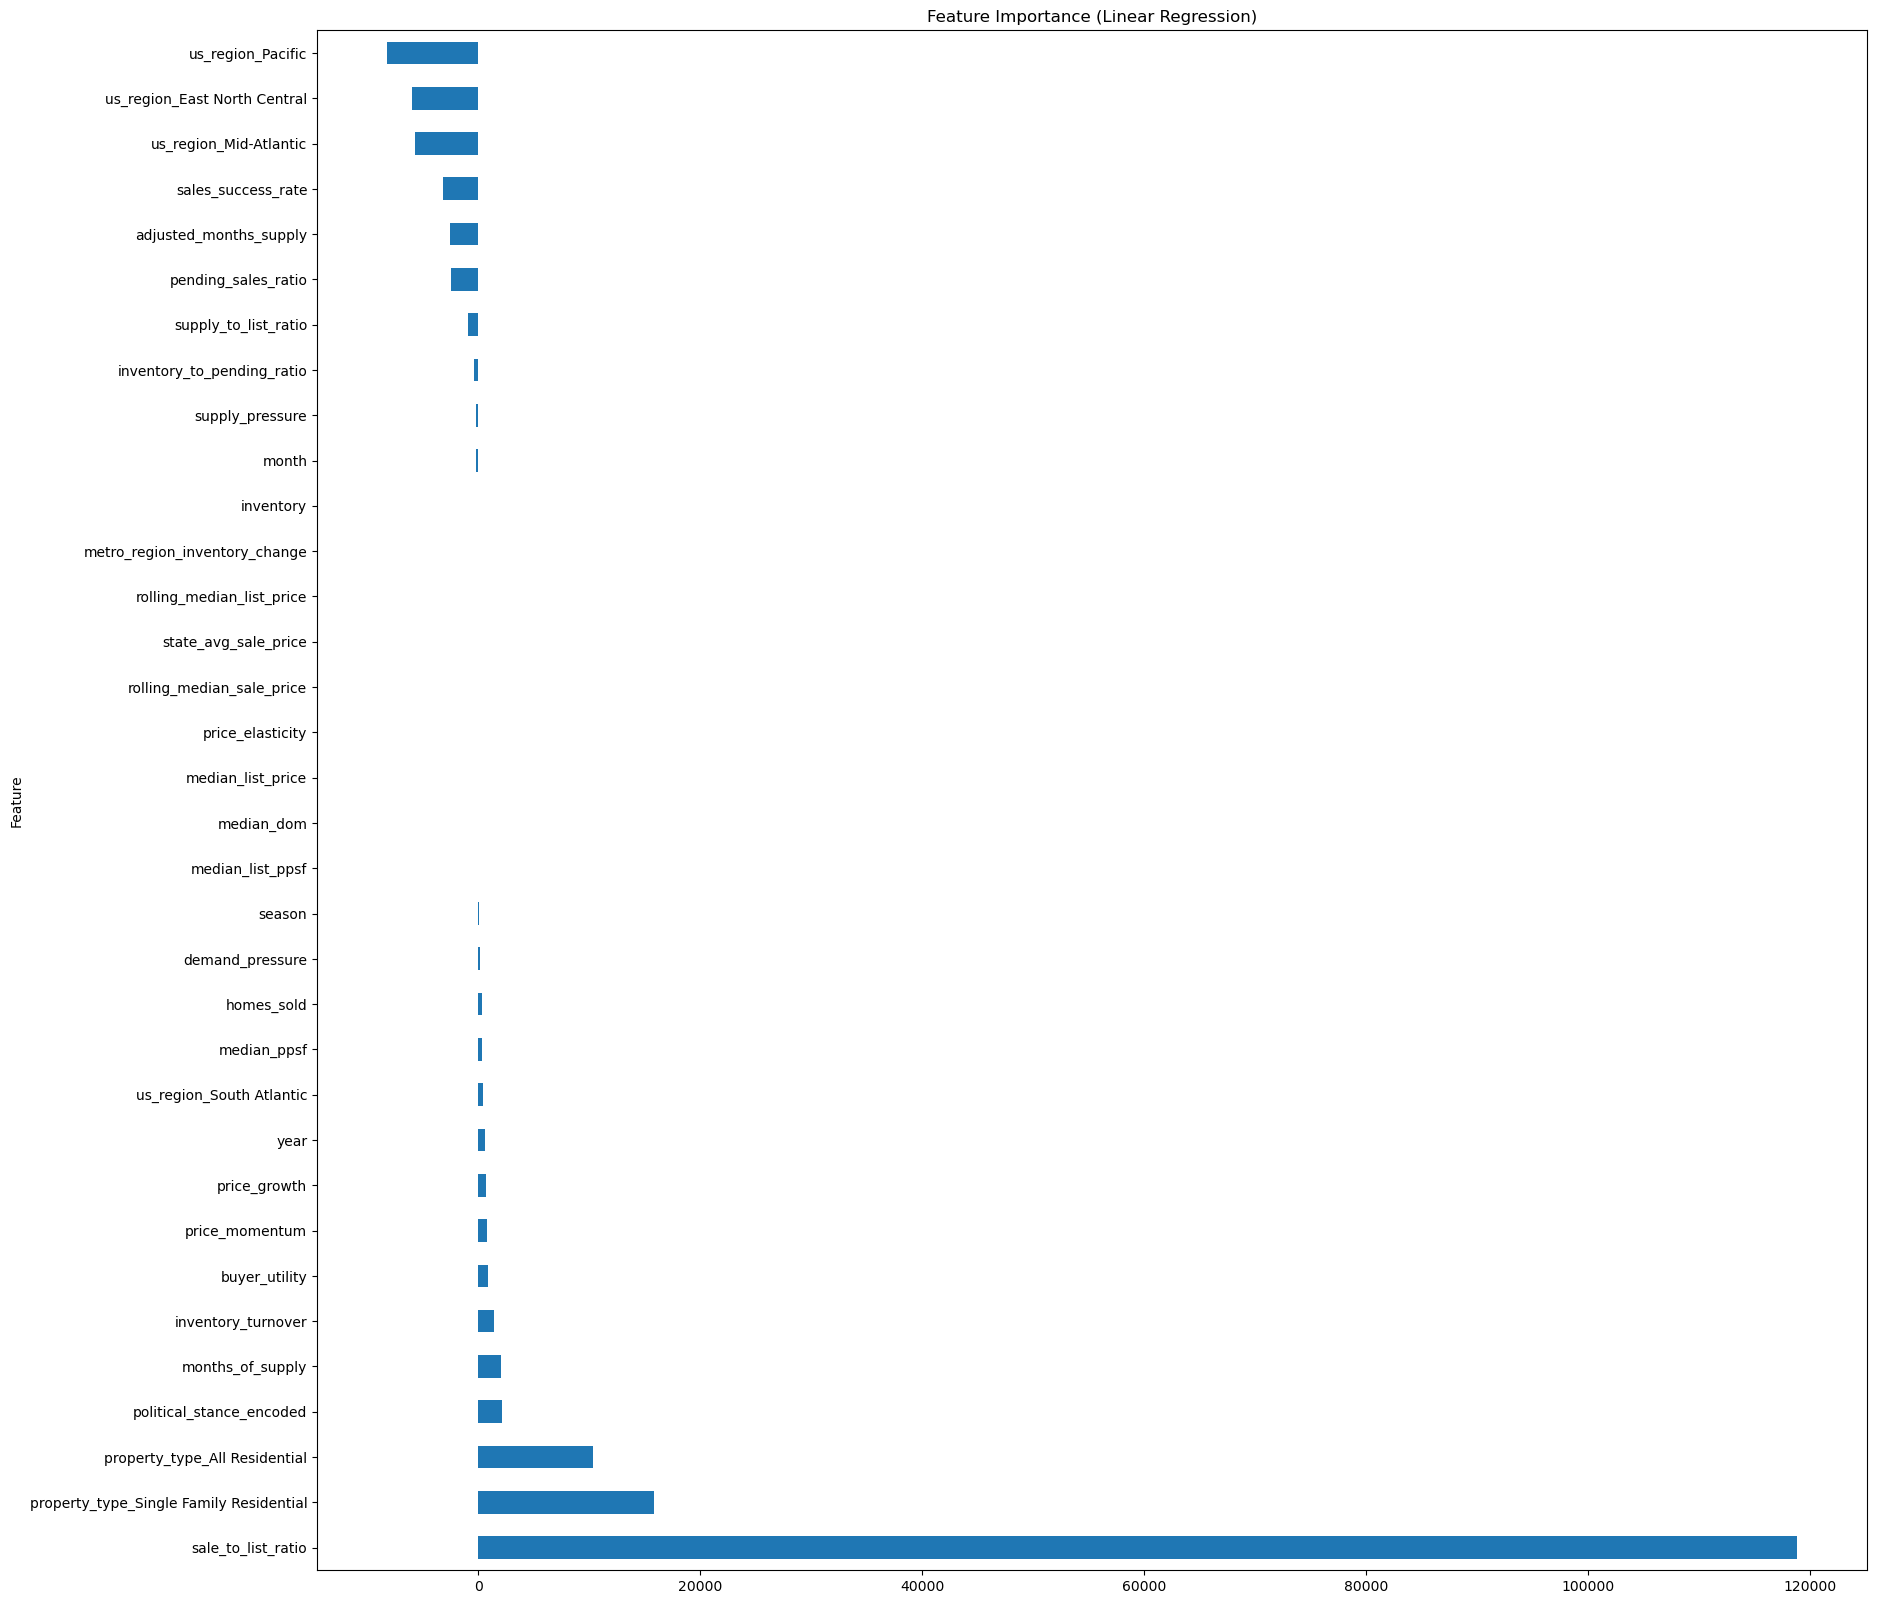

In [13]:
# Plot feature importance based on the coefficients
coeff_df.plot(kind='barh', x='Feature', y='Coefficient', title='Feature Importance (Linear Regression)', legend=False, figsize=(20, 20))
plt.show()

In [14]:
df.columns

Index(['Unnamed: 0', 'median_sale_price', 'median_list_price', 'median_ppsf',
       'median_list_ppsf', 'homes_sold', 'inventory', 'months_of_supply',
       'median_dom', 'year', 'month', 'season', 'sale_to_list_ratio',
       'price_growth', 'buyer_utility', 'pending_sales_ratio',
       'sales_success_rate', 'inventory_turnover', 'adjusted_months_supply',
       'political_stance_encoded', 'supply_to_list_ratio',
       'property_type_All Residential',
       'property_type_Single Family Residential', 'state_avg_sale_price',
       'metro_region_inventory_change', 'inventory_to_pending_ratio',
       'rolling_median_sale_price', 'rolling_median_list_price',
       'price_momentum', 'supply_pressure', 'demand_pressure',
       'price_elasticity', 'us_region_East North Central',
       'us_region_Mid-Atlantic', 'us_region_Pacific',
       'us_region_South Atlantic'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4529592 entries, 0 to 4529591
Data columns (total 36 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   Unnamed: 0                               int64  
 1   median_sale_price                        float64
 2   median_list_price                        float64
 3   median_ppsf                              float64
 4   median_list_ppsf                         float64
 5   homes_sold                               float64
 6   inventory                                float64
 7   months_of_supply                         float64
 8   median_dom                               float64
 9   year                                     float64
 10  month                                    float64
 11  season                                   float64
 12  sale_to_list_ratio                       float64
 13  price_growth                             float64
 14  buyer_utility     